In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tsai.utils import yaml2dict
from tsai.data.external import download_data, save_object
import re


In [9]:
config = yaml2dict('../dev_nbs/config/solfsmy.yaml', attrdict=True)

In [10]:
data = config.data

# From here we will extract the data of F10.7 to check its distribution
fnameF107_historical = data.dataF107_path if data.dataF107_url is None else download_data(data.dataF107_url,
                                                                            fname=data.dataF107_path)

In [11]:
def clean_f10_values(value):
    try:
        # Remove any trailing '+' using regex and convert to float
        cleaned_value = re.sub(r'\+$', '', value)
        return float(cleaned_value)
    except ValueError:
        # If conversion fails, return NaN
        return np.nan
    
def format_datetime(value):
    return pd.to_datetime(value) + pd.to_timedelta('12:00:00')



# Only two columns in the file: Date and F10.7.
df_F10 = pd.read_csv(
        fnameF107_historical, delim_whitespace=True, comment='#', header=None, 
        names=['Datetime', 'F10'], 
        parse_dates=['Datetime'], 
        na_values=[".", "+"], 
        converters={
            'F10': clean_f10_values,
            'Datetime': format_datetime}
        )  
df_F10['F10'] = df_F10['F10'].astype(float)


df_F10 = df_F10[(df_F10['Datetime'] >= '1947-02-14 12:00:00')]

# Fill the missing values with the average of the previous and next value
df_F10['F10'] = ((df_F10['F10'].fillna(method='ffill')) + df_F10['F10'].fillna(method='bfill'))/2
df_F10 = df_F10.reset_index(drop=True)
df_F10

,Datetime,F10
0,1947-02-14 12:00:00,253.90
1,1947-02-15 12:00:00,241.20
2,1947-02-16 12:00:00,241.20
3,1947-02-17 12:00:00,228.50
4,1947-02-18 12:00:00,203.65
...,...,...
26003,2018-04-26 12:00:00,70.30
26004,2018-04-27 12:00:00,69.60
26005,2018-04-28 12:00:00,71.10
26006,2018-04-29 12:00:00,72.20


<Axes: xlabel='Datetime'>

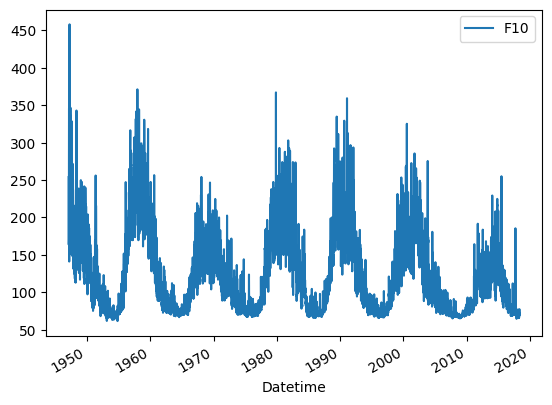

In [12]:
df_F10.plot(y='F10', x='Datetime')

In [15]:
save_object(df_F10, "./preprocessed_data/dataframes/F10_historical.pkl")

preprocessed_data/dataframes directory already exists.
DataFrame saved as preprocessed_data/dataframes/F10_historical.pkl
